1.	Load the data (concrete.csv) file and perform the following task, 
a)	Perform EDA and identify the potential independent variables, with respect to the response variable (Compressive Strength) in the dataset and short list the features.
b)	Fit a suitable regression model (Linear or Non-Linear) to predict Strength of concrete and verify the rmse score of the model.
c)	Show the summary statistics of the model and give a justification for selecting/dropping a variable into the model.
d)	Justify your best model with K-fold cross validation with a comment on Bias and Variance error nature of the model.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,Lasso,LinearRegression, LogisticRegression

In [30]:
df = pd.read_csv('Concrete_Data.csv')
df.head()

Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                      162.0   
1                                      162.0   
2                                      228.0   
3                                      228.0   
4                                      192.0   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                2.5     
1                                                2.5     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                             1040.0      
1                                             1055.0      
2                                              932.0      
3                                              932.0      
4                                              978.4      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
0                                              676.0         28   
1                                              676.0         28   
2                                              594.0        270   
3                                              594.0        365   
4                                              825.5        360   

   Concrete compressive strength(MPa, megapascals)   
0                                             79.99  
1                                             61.89  
2                                             40.27  
3                                             41.05  
4                                             44.30

In [31]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [ ]:
#Renaming the columns

In [32]:
colnames = ['Cement',
       'Blast_Furnace_Slag',
       'Fly_Ash',
       'Water',
       'Superplasticizer',
       'Coarse_Aggregate',
       'Fine_Aggregate', 'Age',
       'Concrete_compressive_strength']

In [33]:
df.columns = colnames

In [34]:
df.head()

Cement  Blast_Furnace_Slag  Fly_Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse_Aggregate  Fine_Aggregate  Age  Concrete_compressive_strength  
0            1040.0           676.0   28                          79.99  
1            1055.0           676.0   28                          61.89  
2             932.0           594.0  270                          40.27  
3             932.0           594.0  365                          41.05  
4             978.4           825.5  360                          44.30

In [ ]:
Here we are determining the compressive strength of cement and hence the 'Target Variable' is 'Concrete_compressive_strength'

Exploratory Data Analysis

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement                           1030 non-null float64
Blast_Furnace_Slag               1030 non-null float64
Fly_Ash                          1030 non-null float64
Water                            1030 non-null float64
Superplasticizer                 1030 non-null float64
Coarse_Aggregate                 1030 non-null float64
Fine_Aggregate                   1030 non-null float64
Age                              1030 non-null int64
Concrete_compressive_strength    1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


Missing values

In [37]:
df.isnull().sum()

Cement                           0
Blast_Furnace_Slag               0
Fly_Ash                          0
Water                            0
Superplasticizer                 0
Coarse_Aggregate                 0
Fine_Aggregate                   0
Age                              0
Concrete_compressive_strength    0
dtype: int64

In [ ]:
There are no missing values in the Dataset

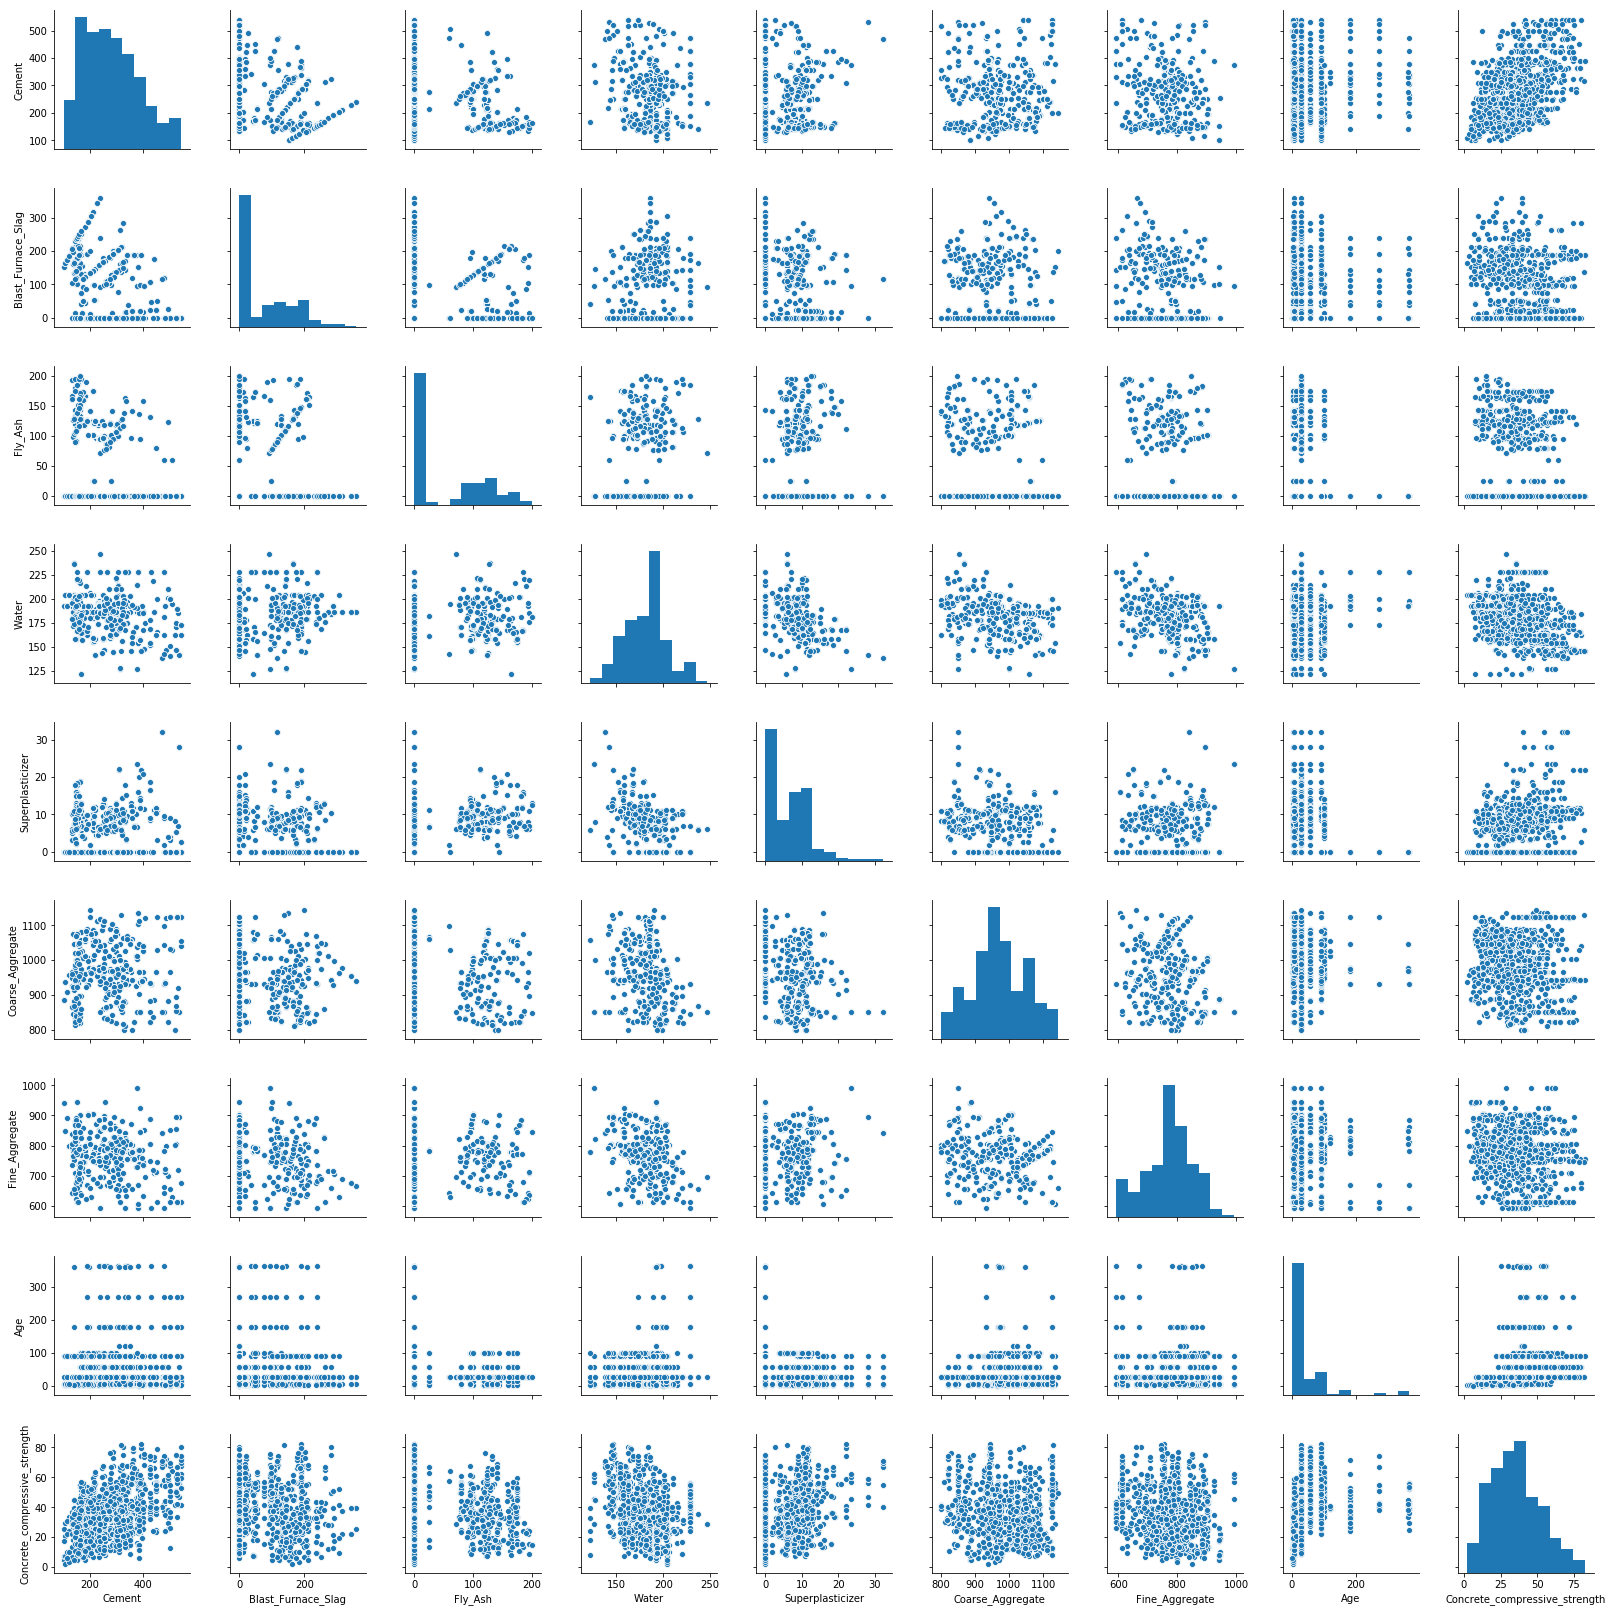

In [204]:
sns.pairplot(df) #There are no attributes which have high correlation among each other

In [ ]:
#Finding Correlation

In [48]:
df.corr()

Cement  Blast_Furnace_Slag   Fly_Ash  \
Cement                         1.000000           -0.275216 -0.397467   
Blast_Furnace_Slag            -0.275216            1.000000 -0.323580   
Fly_Ash                       -0.397467           -0.323580  1.000000   
Water                         -0.081587            0.107252 -0.256984   
Superplasticizer               0.092386            0.043270  0.377503   
Coarse_Aggregate              -0.109349           -0.283999 -0.009961   
Fine_Aggregate                -0.222718           -0.281603  0.079108   
Age                            0.081946           -0.044246 -0.154371   
Concrete_compressive_strength  0.497832            0.134829 -0.105755   

                                  Water  Superplasticizer  Coarse_Aggregate  \
Cement                        -0.081587          0.092386         -0.109349   
Blast_Furnace_Slag             0.107252          0.043270         -0.283999   
Fly_Ash                       -0.256984          0.377503         -0.009961   
Water                          1.000000         -0.657533         -0.182294   
Superplasticizer              -0.657533          1.000000         -0.265999   
Coarse_Aggregate              -0.182294         -0.265999          1.000000   
Fine_Aggregate                -0.450661          0.222691         -0.178481   
Age                            0.277618         -0.192700         -0.003016   
Concrete_compressive_strength -0.289633          0.366079         -0.164935   

                               Fine_Aggregate       Age  \
Cement                              -0.222718  0.081946   
Blast_Furnace_Slag                  -0.281603 -0.044246   
Fly_Ash                              0.079108 -0.154371   
Water                               -0.450661  0.277618   
Superplasticizer                     0.222691 -0.192700   
Coarse_Aggregate                    -0.178481 -0.003016   
Fine_Aggregate                       1.000000 -0.156095   
Age                                 -0.156095  1.000000   
Concrete_compressive_strength       -0.167241  0.328873   

                               Concrete_compressive_strength  
Cement                                              0.497832  
Blast_Furnace_Slag                                  0.134829  
Fly_Ash                                            -0.105755  
Water                                              -0.289633  
Superplasticizer                                    0.366079  
Coarse_Aggregate                                   -0.164935  
Fine_Aggregate                                     -0.167241  
Age                                                 0.328873  
Concrete_compressive_strength                       1.000000

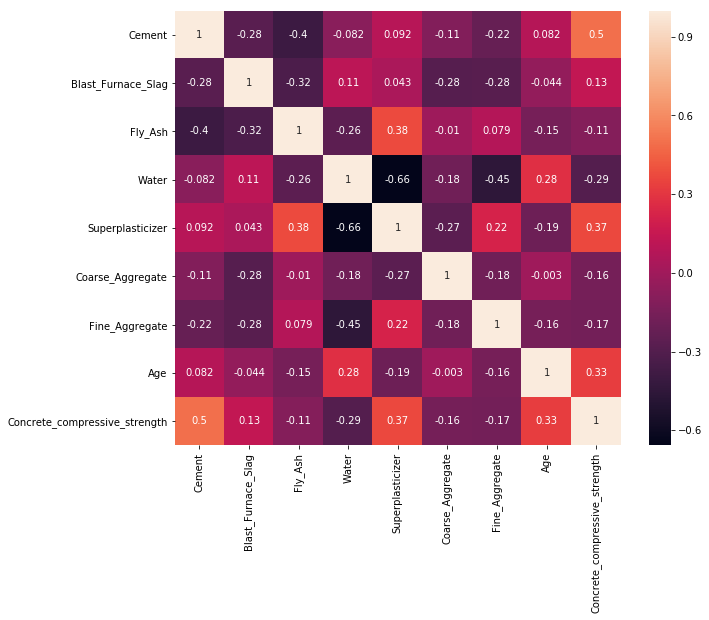

In [49]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True)

In [ ]:
#from above heat map we can observe that Target variable is not too correlated with any other attribute

In [38]:
df.describe()

Cement  Blast_Furnace_Slag      Fly_Ash        Water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    54.188350   181.567282   
std     104.506364           86.279342    63.997004    21.354219   
min     102.000000            0.000000     0.000000   121.800000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.300000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       Superplasticizer  Coarse_Aggregate  Fine_Aggregate          Age  \
count       1030.000000       1030.000000     1030.000000  1030.000000   
mean           6.204660        972.918932      773.580485    45.662136   
std            5.973841         77.753954       80.175980    63.169912   
min            0.000000        801.000000      594.000000     1.000000   
25%            0.000000        932.000000      730.950000     7.000000   
50%            6.400000        968.000000      779.500000    28.000000   
75%           10.200000       1029.400000      824.000000    56.000000   
max           32.200000       1145.000000      992.600000   365.000000   

       Concrete_compressive_strength  
count                    1030.000000  
mean                       35.817961  
std                        16.705742  
min                         2.330000  
25%                        23.710000  
50%                        34.445000  
75%                        46.135000  
max                        82.600000

In [ ]:
#when we perform descriptive stats on Data we have identified that there are attributes where most of elements are in Q3; hence we can find outliers by visualising those attrbutes using box plot

In [ ]:
#Creating Box Plots for elements to observe the presence of outliers

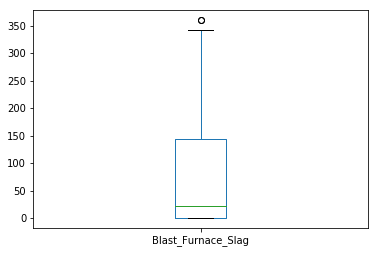

In [40]:
df['Blast_Furnace_Slag'].plot(kind = 'box')

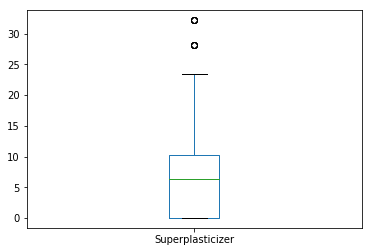

In [47]:
df['Superplasticizer'].plot(kind = 'box')

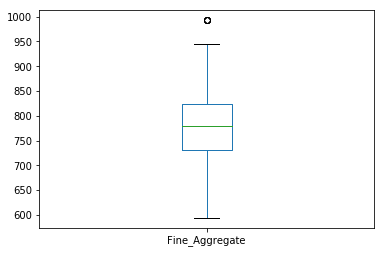

In [45]:
df['Fine_Aggregate'].plot(kind = 'box')

In [ ]:
# we can observe there are very few outliers and removing the records might effect the model. Hence we are not deleting any records

Model selection

In [ ]:
#Considering all attributes except Target as Independent variables

In [50]:
X = df.drop(['Concrete_compressive_strength'],axis = 1) 
y = df['Concrete_compressive_strength']

In [ ]:
#Performing Train Test split

In [88]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
#Here we are fitting the model only to Training Data and once we find the best model with minimum RMSE score, we fit that model to Test data

In [ ]:
#Ridge Model using Kfold Cross Validation

In [65]:
from sklearn.model_selection import KFold

In [67]:
from sklearn.metrics import mean_squared_error,r2_score

In [89]:
kf=KFold(n_splits=5,shuffle=True,random_state=2)
rmse=[]
r2 = []
for train,test in kf.split(x_train,y_train): #Here we have given only Training data
    rd = Ridge()
    Xtrain,Xtest=x_train.iloc[train,:],x_train.iloc[test,:]
    Ytrain,Ytest=y_train.iloc[train],y_train.iloc[test]
    rd.fit(Xtrain,Ytrain)
    Y_predict=rd.predict(Xtest)
    rmse.append(np.sqrt(mean_squared_error(Ytest,Y_predict)))
    r2.append(r2_score(Ytest,Y_predict))
print("Cross-validated rmse:%.5f%% " % np.mean(rmse))
print("Cross-validated r2:%.5f%% " % np.mean(r2))

Cross-validated rmse:10.49831% 
Cross-validated r2:0.61270% 


In [ ]:
#Lasso using Kfold CV

In [92]:
kf=KFold(n_splits=5,shuffle=True,random_state=2)
rmse=[]
r2 = []
for train,test in kf.split(x_train,y_train):
    rd = Lasso()
    Xtrain,Xtest=x_train.iloc[train,:],x_train.iloc[test,:]
    Ytrain,Ytest=y_train.iloc[train],y_train.iloc[test]
    rd.fit(Xtrain,Ytrain)
    Y_predict=rd.predict(Xtest)
    rmse.append(np.sqrt(mean_squared_error(Ytest,Y_predict)))
    r2.append(r2_score(Ytest,Y_predict))
print("Cross-validated rmse:%.5f%% " % np.mean(rmse))
print("Cross-validated r2:%.5f%% " % np.mean(r2))

Cross-validated rmse:10.50063% 
Cross-validated r2:0.61250% 


In [ ]:
#Linear Regression using Kfold CV

In [91]:
kf=KFold(n_splits=5,shuffle=True,random_state=2)
rmse=[]
r2 = []
for train,test in kf.split(x_train,y_train):
    rd = LinearRegression()
    Xtrain,Xtest=x_train.iloc[train,:],x_train.iloc[test,:]
    Ytrain,Ytest=y_train.iloc[train],y_train.iloc[test]
    rd.fit(Xtrain,Ytrain)
    Y_predict=rd.predict(Xtest)
    rmse.append(np.sqrt(mean_squared_error(Ytest,Y_predict)))
    r2.append(r2_score(Ytest,Y_predict))
print("Cross-validated rmse:%.5f%% " % np.mean(rmse))
print("Cross-validated r2:%.5f%% " % np.mean(r2))

Cross-validated rmse:10.49832% 
Cross-validated r2:0.61270% 


In [ ]:
#b)	Fit a suitable regression model (Linear or Non-Linear) to predict Strength of concrete and verify the rmse score of the model.

In [95]:
models = np.array(['Linear Regression', 'Ridge', 'Lasso'])
RMSE = np.array([10.49832,10.49831,10.50063])
Rsquare = np.array([0.61270,0.61270,0.61250])

In [96]:
values = pd.DataFrame({'models' : models, 'RMSE': RMSE, 'Rsquare': Rsquare})
values

models      RMSE  Rsquare
0  Linear Regression  10.49832   0.6127
1              Ridge  10.49831   0.6127
2              Lasso  10.50063   0.6125

In [ ]:
# from above values we can say the best model to fit is "Ridge"

In [ ]:
c)	Show the summary statistics of the model and give a justification for selecting/dropping a variable into the model.

In [ ]:
Identifying P values using OLS

In [105]:
import statsmodels.formula.api as smf

In [106]:
df.columns

Index(['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age',
       'Concrete_compressive_strength'],
      dtype='object')

In [109]:
M3 = smf.ols('Concrete_compressive_strength ~ Cement + Blast_Furnace_Slag + Fly_Ash + Water + Superplasticizer + Coarse_Aggregate + Fine_Aggregate + Age',df).fit()
M3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Concrete_compressive_strength   R-squared:                       0.616
Model:                                       OLS   Adj. R-squared:                  0.613
Method:                            Least Squares   F-statistic:                     204.3
Date:                           Wed, 13 Feb 2019   Prob (F-statistic):          6.29e-206
Time:                                   12:19:43   Log-Likelihood:                -3869.0
No. Observations:                           1030   AIC:                             7756.
Df Residuals:                               1021   BIC:                             7800.
Df Model:                                      8                                         
Covariance Type:                       nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -23.3312     26.586     -0.878      0.380     -75.500      28.837
Cement                 0.1198      0.008     14.113      0.000       0.103       0.136
Blast_Furnace_Slag     0.1039      0.010     10.247      0.000       0.084       0.124
Fly_Ash                0.0879      0.013      6.988      0.000       0.063       0.113
Water                 -0.1499      0.040     -3.731      0.000      -0.229      -0.071
Superplasticizer       0.2922      0.093      3.128      0.002       0.109       0.476
Coarse_Aggregate       0.0181      0.009      1.926      0.054      -0.000       0.037
Fine_Aggregate         0.0202      0.011      1.887      0.059      -0.001       0.041
Age                    0.1142      0.005     21.046      0.000       0.104       0.125
==============================================================================
Omnibus:                        5.378   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.304
Skew:                          -0.174   Prob(JB):                       0.0705
Kurtosis:                       3.045   Cond. No.                     1.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
The above Summay Statistics infer that there are no P values of attributes which are greater than alpha(0.05).
 So our initial assumption to take all attributes is correct. And hence we have not dropped any attributes to fit amodel

In [ ]:
d)	Justify your best model with K-fold cross validation with a comment on Bias and Variance error nature of the model.

In [ ]:
Scaling the features

In [ ]:
#since ranges of each value is pretty high; scaling/standardising each independent feature will make magnitudes at same level

In [ ]:
Calcualting RMSE for this scaled Train data using Ridge

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
scaler = StandardScaler().fit(x_train)
x_train_scaled = pd.DataFrame(scaler.transform(x_train),
                              columns = x_train.columns)
x_train_scaled.head()

c:\users\indu0\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\indu0\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


Cement  Blast_Furnace_Slag   Fly_Ash     Water  Superplasticizer  \
0  1.117617            0.251577 -0.837997 -1.588280          0.873145   
1 -0.649324           -0.220151  1.075811 -1.208489          0.572704   
2  1.535481           -0.563855  0.402289 -0.912066          0.906527   
3  0.249746           -0.840663 -0.837997  0.477415         -1.029645   
4  1.336948            0.385368 -0.837997 -1.305752          1.724393   

   Coarse_Aggregate  Fine_Aggregate       Age  
0         -0.349506        0.994446 -0.285647  
1          0.517594        0.106694 -0.496785  
2         -0.090018       -0.745051 -0.602354  
3         -0.051480        0.968372  4.721336  
4         -1.566014        1.429010  0.664473

In [ ]:
#Ridge using Kfold Validation on this scaled data

In [99]:
kf=KFold(n_splits=5,shuffle=True,random_state=1)
rmse=[]
r2 = []
for train,test in kf.split(x_train_scaled,y_train):
    model=Ridge()
    Xtrain,Xtest=x_train_scaled.iloc[train,:],x_train_scaled.iloc[test,:]
    Ytrain,Ytest=y_train.iloc[train],y_train.iloc[test]
    model.fit(Xtrain,Ytrain)
    Y_predict=model.predict(Xtest)
    rmse.append(np.sqrt(mean_squared_error(Ytest,Y_predict)))
    r2.append(r2_score(Ytest,Y_predict))
print("Cross-validated rmse:%.4f%% " % np.mean(rmse))
print("Cross-validated r score:%.4f%% " % np.mean(r2))

Cross-validated rmse:10.6459% 
Cross-validated r score:0.5974% 


In [ ]:
#Scaling Test Data and fitting Ridge Model

In [102]:
scaler = StandardScaler().fit(x_test)
x_test_scaled = pd.DataFrame(scaler.transform(x_test),
                              columns = x_train.columns)
x_test_scaled.head()

c:\users\indu0\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\indu0\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


Cement  Blast_Furnace_Slag   Fly_Ash     Water  Superplasticizer  \
0 -0.780511           -0.925178  0.663153 -0.534859          0.195675   
1 -1.198165            0.786781  0.844868  1.921043          0.637326   
2 -0.198236           -0.925178 -0.884503  0.193545         -1.078317   
3 -0.910584            2.313535 -0.884503  0.227996         -1.078317   
4  0.624877           -0.925178 -0.884503  0.538060         -1.078317   

   Coarse_Aggregate  Fine_Aggregate       Age  
0          0.382069        1.559413  0.321247  
1         -0.588827       -1.560059 -0.260893  
2          1.848796        0.052756 -0.260893  
3          0.568979       -0.838705 -0.697499  
4         -0.484988        0.802247  1.028132

In [104]:
model1 = Ridge()
model1.fit(x_test_scaled,y_test)
test_pred = model1.predict(x_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test,test_pred))
r_square = r2_score(y_test,test_pred)
print(rmse)
print(r_square)

9.90036999570589
0.6016024182240344


In [ ]:
#RMSE for test data is decreased which means our model is performing better with new data

In [ ]:
As we include more features, model complexity increases; we tend to over fit the model and training error will be usually low.And hence Bias is high.
But after certain point of model complexity even when Train Error decreases, Test Error will start to increase.
Model with Low Bias and Low Variance predicts the values accurately.

So, if we use less features we under fit the model and if we increase complexity by adding more features we overfit the model.
Its always profittable to choose optimum model complexity to ensure model performs with better predictions.


In [ ]:
2.	Load the (Parkinson.csv) file and perform the following task,
a)	Refer to this link, https://archive.ics.uci.edu/ml/datasets/parkinsons and read the description of the dataset and attach suitable headers.
b)	Status is the outcome variable, with ‘0’ – healthy and ‘1’ – Parkinson Disease. 
c)	Perform EDA and apply suitable regression model to predict the status of the disease. 
d)	Validate the model with K-fold cross validation and comment on the following performance metrics, Precision, Recall, Specificity and AUC values of the model.

In [110]:
data = pd.read_csv('parkinson.csv')
data.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer    ...     \
0           0.00007   0.00370   0.00554     0.01109       0.04374    ...      
1           0.00008   0.00465   0.00696     0.01394       0.06134    ...      
2           0.00009   0.00544   0.00781     0.01633       0.05233    ...      
3           0.00009   0.00502   0.00698     0.01505       0.05492    ...      
4           0.00011   0.00655   0.00908     0.01966       0.06425    ...      

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [111]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [112]:
colnames = ['name', 'MDVP:Fo', 'MDVP:Fhi', 'MDVP:Flo', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']

In [ ]:
#Renaming the columns

In [114]:
data.columns = colnames

In [116]:
data.head()

name  MDVP:Fo  MDVP:Fhi  MDVP:Flo  MDVP:Jitter(%)  \
0  phon_R01_S01_1  119.992   157.302    74.997         0.00784   
1  phon_R01_S01_2  122.400   148.650   113.819         0.00968   
2  phon_R01_S01_3  116.682   131.111   111.555         0.01050   
3  phon_R01_S01_4  116.676   137.871   111.366         0.00997   
4  phon_R01_S01_5  116.014   141.781   110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer    ...     \
0           0.00007   0.00370   0.00554     0.01109       0.04374    ...      
1           0.00008   0.00465   0.00696     0.01394       0.06134    ...      
2           0.00009   0.00544   0.00781     0.01633       0.05233    ...      
3           0.00009   0.00502   0.00698     0.01505       0.05492    ...      
4           0.00011   0.00655   0.00908     0.01966       0.06425    ...      

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo             195 non-null float64
MDVP:Fhi            195 non-null float64
MDVP:Flo            195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [ ]:
Here the Target Variable is 'status' which depicts Healthy as '0' and people with Parkinsons Disease as '1'

In [177]:
data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

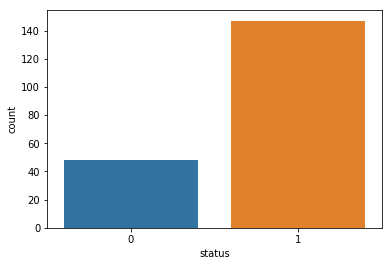

In [181]:
sns.countplot(data['status'])

In [ ]:
#so our data set contains 147 records with Status as 1 

In [ ]:
#Descriptive statistics

In [119]:
data.describe()

MDVP:Fo    MDVP:Fhi    MDVP:Flo  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
count  195.000000  195.000000  195.000000      195.000000        195.000000   
mean   154.228641  197.104918  116.324631        0.006220          0.000044   
std     41.390065   91.491548   43.521413        0.004848          0.000035   
min     88.333000  102.145000   65.476000        0.001680          0.000007   
25%    117.572000  134.862500   84.291000        0.003460          0.000020   
50%    148.790000  175.829000  104.315000        0.004940          0.000030   
75%    182.769000  224.205500  140.018500        0.007365          0.000060   
max    260.105000  592.030000  239.170000        0.033160          0.000260   

         MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  \
count  195.000000  195.000000  195.000000    195.000000        195.000000   
mean     0.003306    0.003446    0.009920      0.029709          0.282251   
std      0.002968    0.002759    0.008903      0.018857          0.194877   
min      0.000680    0.000920    0.002040      0.009540          0.085000   
25%      0.001660    0.001860    0.004985      0.016505          0.148500   
50%      0.002500    0.002690    0.007490      0.022970          0.221000   
75%      0.003835    0.003955    0.011505      0.037885          0.350000   
max      0.021440    0.019580    0.064330      0.119080          1.302000   

          ...      Shimmer:DDA         NHR         HNR      status  \
count     ...       195.000000  195.000000  195.000000  195.000000   
mean      ...         0.046993    0.024847   21.885974    0.753846   
std       ...         0.030459    0.040418    4.425764    0.431878   
min       ...         0.013640    0.000650    8.441000    0.000000   
25%       ...         0.024735    0.005925   19.198000    1.000000   
50%       ...         0.038360    0.011660   22.085000    1.000000   
75%       ...         0.060795    0.025640   25.075500    1.000000   
max       ...         0.169420    0.314820   33.047000    1.000000   

             RPDE         DFA     spread1     spread2          D2         PPE  
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000  
mean     0.498536    0.718099   -5.684397    0.226510    2.381826    0.206552  
std      0.103942    0.055336    1.090208    0.083406    0.382799    0.090119  
min      0.256570    0.574282   -7.964984    0.006274    1.423287    0.044539  
25%      0.421306    0.674758   -6.450096    0.174351    2.099125    0.137451  
50%      0.495954    0.722254   -5.720868    0.218885    2.361532    0.194052  
75%      0.587562    0.761881   -5.046192    0.279234    2.636456    0.252980  
max      0.685151    0.825288   -2.434031    0.450493    3.671155    0.527367  

[8 rows x 23 columns]

In [ ]:
From above details we can see there are data points with large variation such as [MDVP:Fhi,HNR,NHR,MDVP:Flo]; so outliers could be present in such variables

In [ ]:
#creating Box plots for attributes

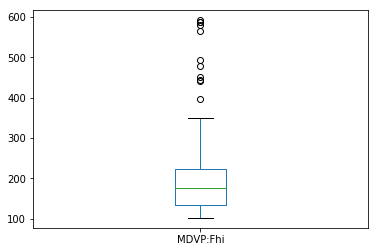

In [121]:
data['MDVP:Fhi'].plot(kind = 'box')

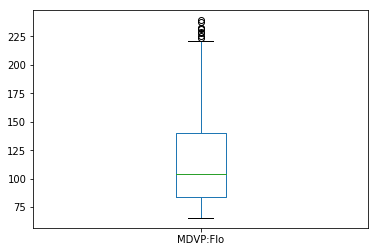

In [122]:
data['MDVP:Flo'].plot(kind = 'box')

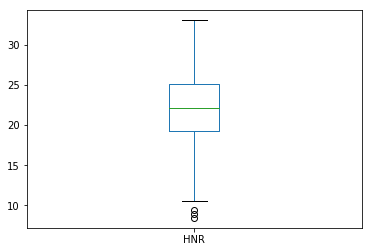

In [123]:
data['HNR'].plot(kind = 'box')

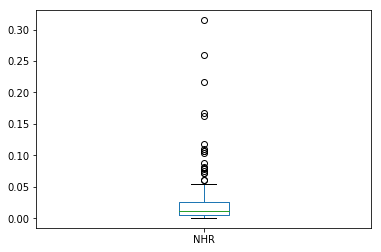

In [125]:
data['NHR'].plot(kind = 'box')

In [ ]:
# we can observe there are outliers and removing the records might effect the model

In [ ]:
#Identifying attributes with high correlation w.r.t Target

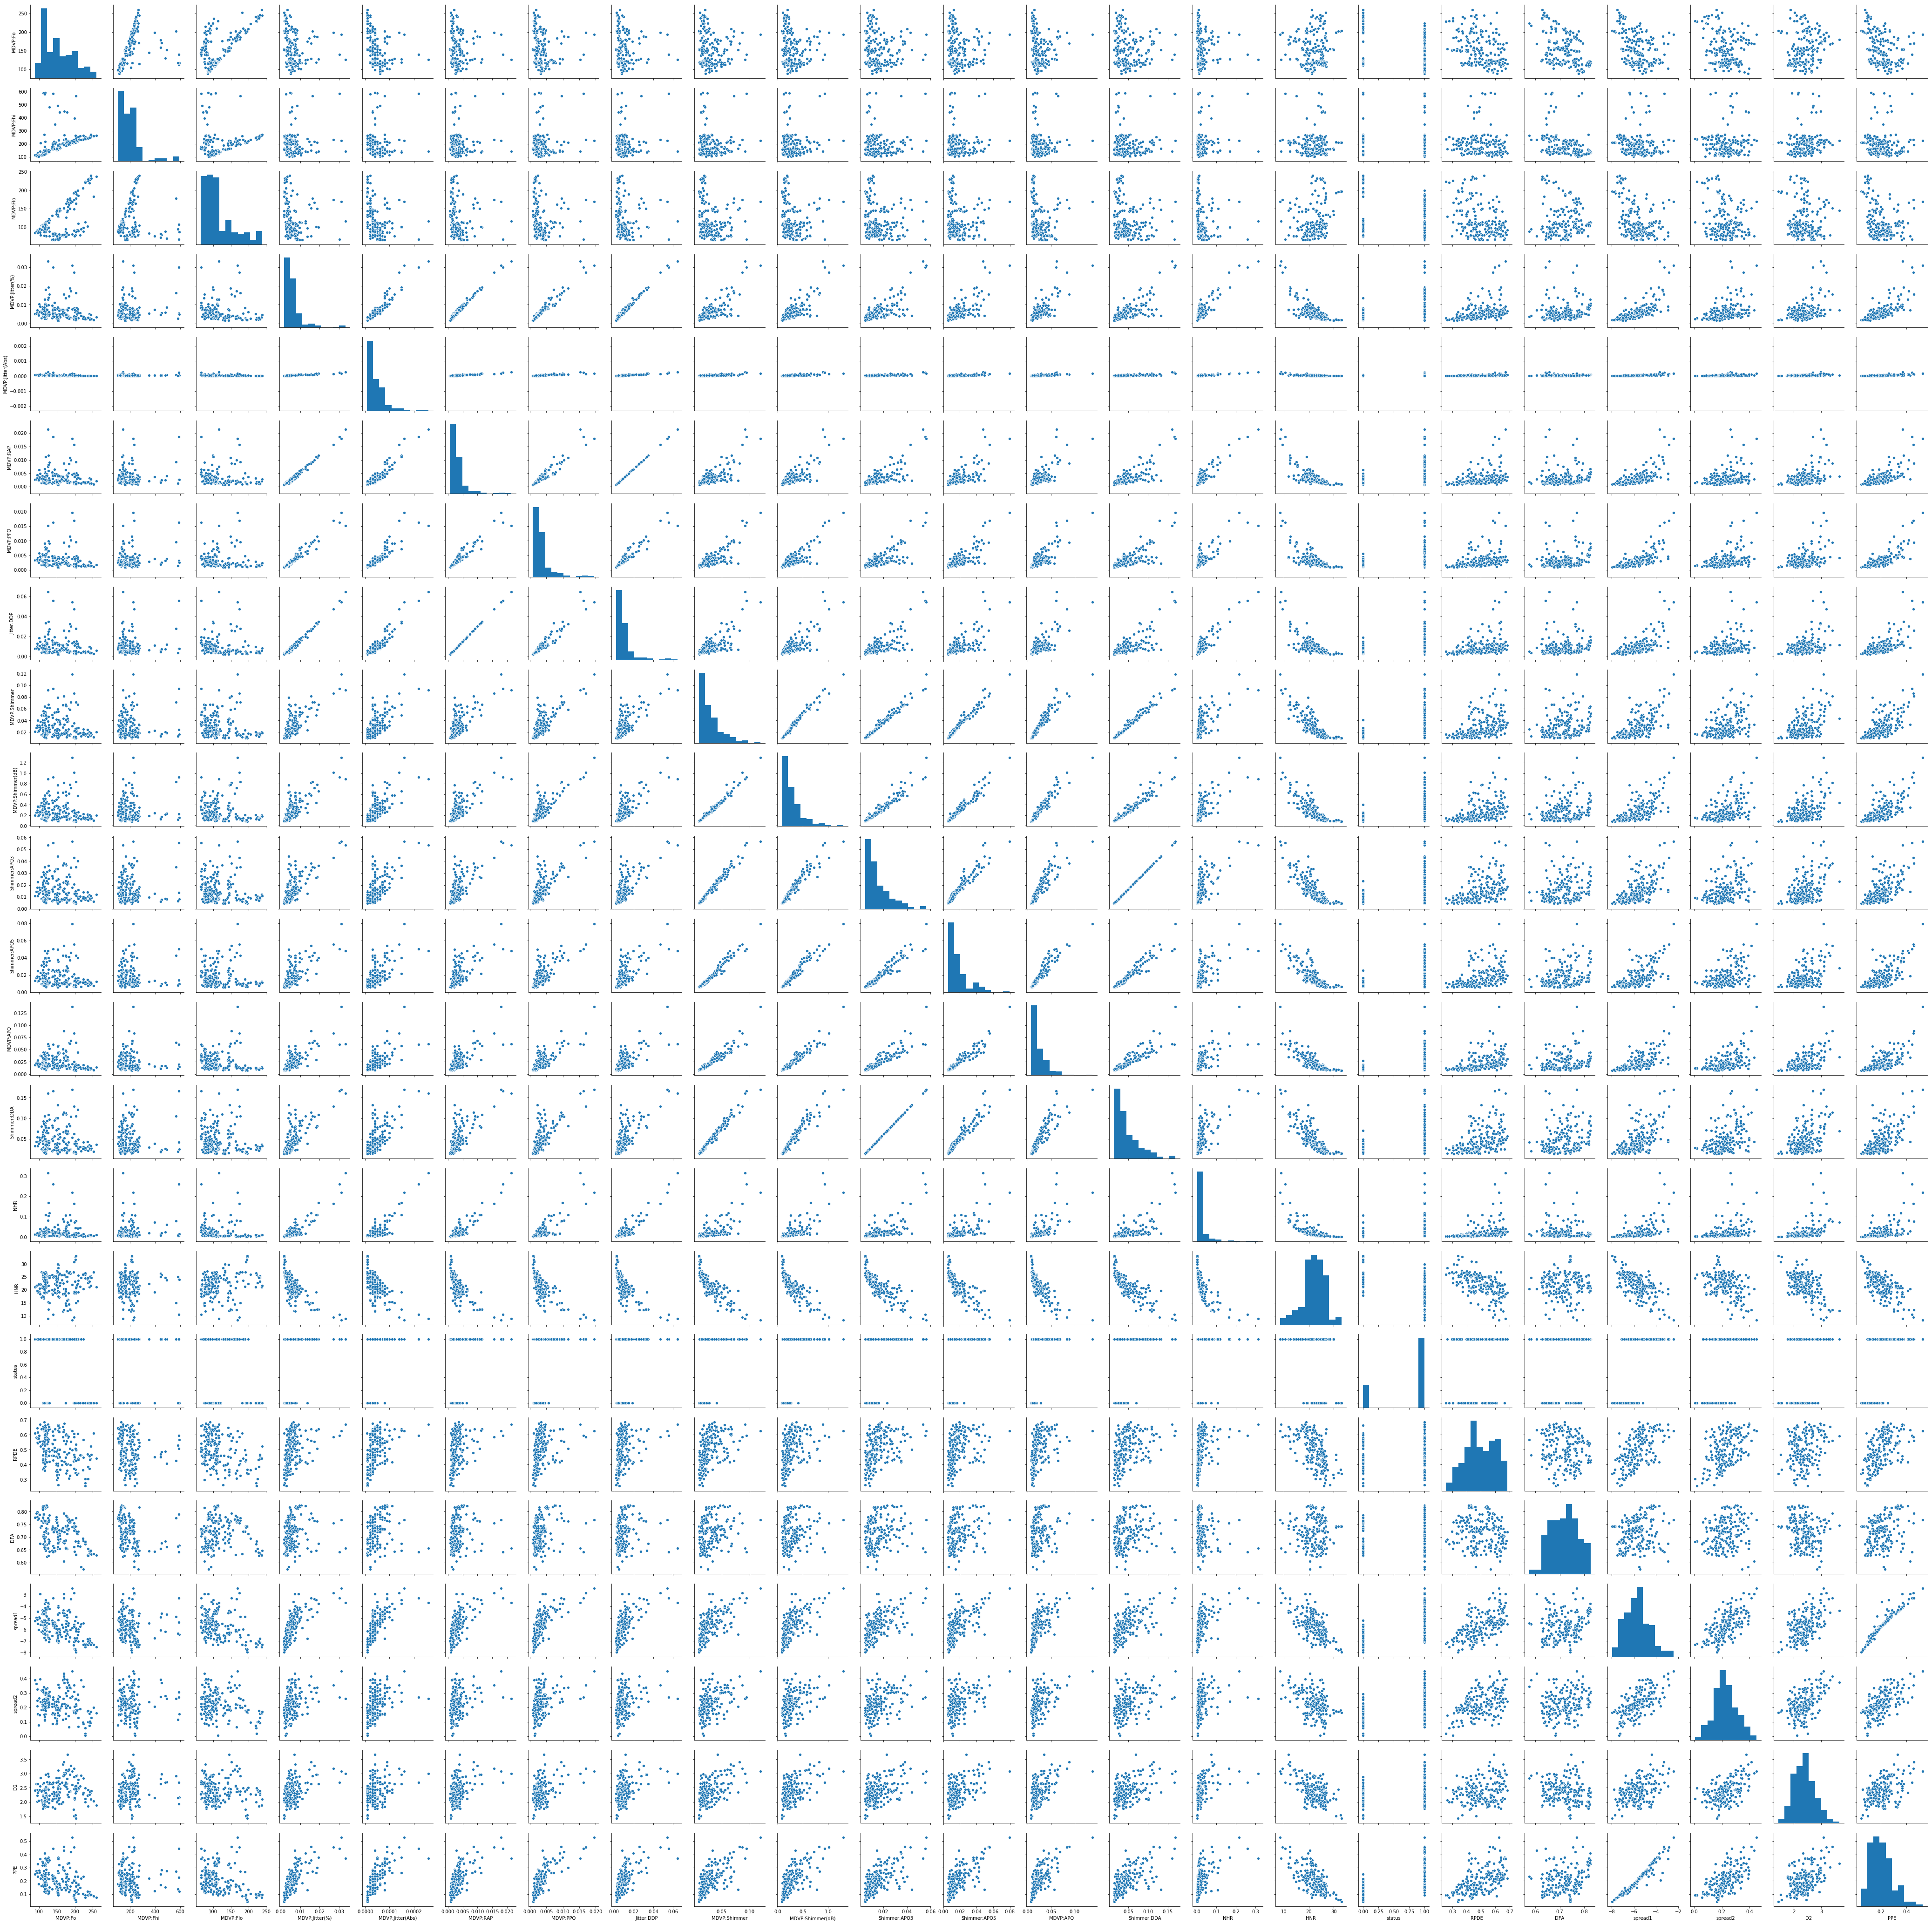

In [206]:
sns.pairplot(data)

In [126]:
data.corr()

MDVP:Fo  MDVP:Fhi  MDVP:Flo  MDVP:Jitter(%)  \
MDVP:Fo           1.000000  0.400985  0.596546       -0.118003   
MDVP:Fhi          0.400985  1.000000  0.084951        0.102086   
MDVP:Flo          0.596546  0.084951  1.000000       -0.139919   
MDVP:Jitter(%)   -0.118003  0.102086 -0.139919        1.000000   
MDVP:Jitter(Abs) -0.382027 -0.029198 -0.277815        0.935714   
MDVP:RAP         -0.076194  0.097177 -0.100519        0.990276   
MDVP:PPQ         -0.112165  0.091126 -0.095828        0.974256   
Jitter:DDP       -0.076213  0.097150 -0.100488        0.990276   
MDVP:Shimmer     -0.098374  0.002281 -0.144543        0.769063   
MDVP:Shimmer(dB) -0.073742  0.043465 -0.119089        0.804289   
Shimmer:APQ3     -0.094717 -0.003743 -0.150747        0.746625   
Shimmer:APQ5     -0.070682 -0.009997 -0.101095        0.725561   
MDVP:APQ         -0.077774  0.004937 -0.107293        0.758255   
Shimmer:DDA      -0.094732 -0.003733 -0.150737        0.746635   
NHR              -0.021981  0.163766 -0.108670        0.906959   
HNR               0.059144 -0.024893  0.210851       -0.728165   
status           -0.383535 -0.166136 -0.380200        0.278220   
RPDE             -0.383894 -0.112404 -0.400143        0.360673   
DFA              -0.446013 -0.343097 -0.050406        0.098572   
spread1          -0.413738 -0.076658 -0.394857        0.693577   
spread2          -0.249450 -0.002954 -0.243829        0.385123   
D2                0.177980  0.176323 -0.100629        0.433434   
PPE              -0.372356 -0.069543 -0.340071        0.721543   

                  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  \
MDVP:Fo                  -0.382027 -0.076194 -0.112165   -0.076213   
MDVP:Fhi                 -0.029198  0.097177  0.091126    0.097150   
MDVP:Flo                 -0.277815 -0.100519 -0.095828   -0.100488   
MDVP:Jitter(%)            0.935714  0.990276  0.974256    0.990276   
MDVP:Jitter(Abs)          1.000000  0.922911  0.897778    0.922913   
MDVP:RAP                  0.922911  1.000000  0.957317    1.000000   
MDVP:PPQ                  0.897778  0.957317  1.000000    0.957319   
Jitter:DDP                0.922913  1.000000  0.957319    1.000000   
MDVP:Shimmer              0.703322  0.759581  0.797826    0.759555   
MDVP:Shimmer(dB)          0.716601  0.790652  0.839239    0.790621   
Shimmer:APQ3              0.697153  0.744912  0.763580    0.744894   
Shimmer:APQ5              0.648961  0.709927  0.786780    0.709907   
MDVP:APQ                  0.648793  0.737455  0.804139    0.737439   
Shimmer:DDA               0.697170  0.744919  0.763592    0.744901   
NHR                       0.834972  0.919521  0.844604    0.919548   
HNR                      -0.656810 -0.721543 -0.731510   -0.721494   
status                    0.338653  0.266668  0.288698    0.266646   
RPDE                      0.441839  0.342140  0.333274    0.342079   
DFA                       0.175036  0.064083  0.196301    0.064026   
spread1                   0.735779  0.648328  0.716489    0.648328   
spread2                   0.388543  0.324407  0.407605    0.324377   
D2                        0.310694  0.426605  0.412524    0.426556   
PPE                       0.748162  0.670999  0.769647    0.671005   

                  MDVP:Shimmer  MDVP:Shimmer(dB)    ...     Shimmer:DDA  \
MDVP:Fo              -0.098374         -0.073742    ...       -0.094732   
MDVP:Fhi              0.002281          0.043465    ...       -0.003733   
MDVP:Flo             -0.144543         -0.119089    ...       -0.150737   
MDVP:Jitter(%)        0.769063          0.804289    ...        0.746635   
MDVP:Jitter(Abs)      0.703322          0.716601    ...        0.697170   
MDVP:RAP              0.759581          0.790652    ...        0.744919   
MDVP:PPQ              0.797826          0.839239    ...        0.763592   
Jitter:DDP            0.759555          0.790621    ...        0.744901   
MDVP:Shimmer          1.000000          0.987258    ...        0.987626   
MDV

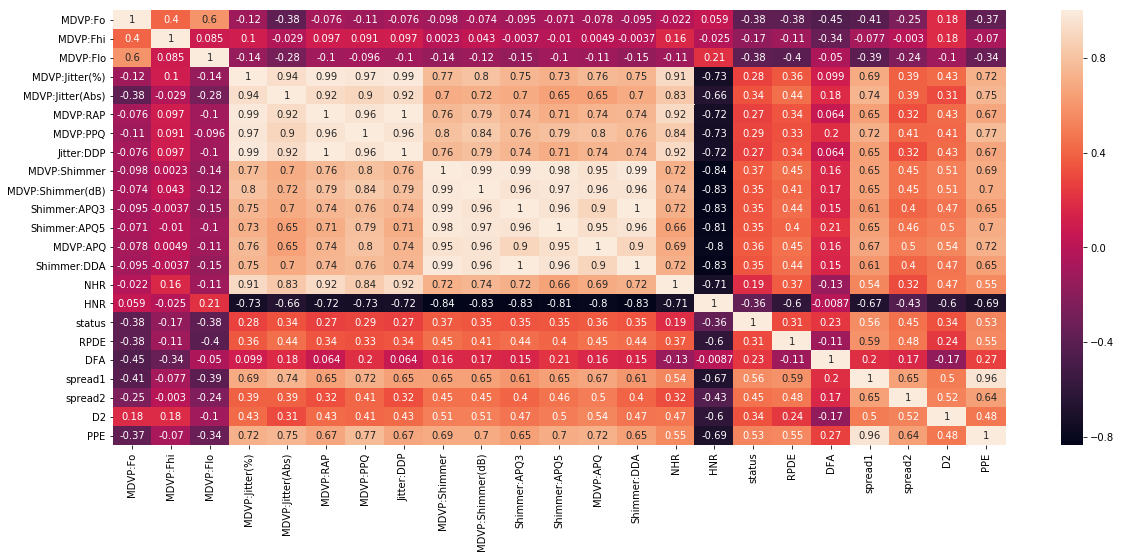

In [129]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(),annot = True)

In [ ]:
From the above correlation values we can observe that there are exactly no specific attribute that has high correlation with
Target variable.

But we can also observe that there are other independent attributes which have high correlation with each other which 
leads to Multi Collinearity

Hence we can identify the attributes with MultiCollinearity by calculating VIF (Variance Inflation Factor)

In [ ]:
Before applying VIF, we can observe that there are some attributes which have high ranged values. Scaling the attributes would 
make their magnitudes at same level

In [130]:
x1 = data.drop(['name','status'],axis =1)
y1 = data['status']

In [140]:
scaler = StandardScaler().fit(x1)
x_scaled = pd.DataFrame(scaler.transform(x1),columns = x1.columns)
x_scaled.head()

MDVP:Fo  MDVP:Fhi  MDVP:Flo  MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  \
0 -0.829300 -0.436165 -0.952037        0.334914          0.749759  0.132963   
1 -0.770972 -0.530974 -0.057721        0.715418          1.037674  0.453892   
2 -0.909476 -0.723168 -0.109875        0.884991          1.325589  0.720770   
3 -0.909622 -0.649092 -0.114229        0.775389          1.325589  0.578885   
4 -0.925657 -0.606245 -0.130608        1.368893          1.901418  1.095750   

   MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)    ...     MDVP:APQ  \
0  0.760800    0.131755      0.745985          0.739536    ...     0.332985   
1  1.276809    0.452684      1.681731          1.768464    ...     1.159454   
2  1.585687    0.721813      1.202693          1.027636    ...     0.699187   
3  1.284076    0.577677      1.340396          1.207698    ...     0.806859   
4  2.047187    1.096793      1.836448          1.552389    ...     1.216839   

   Shimmer:DDA       NHR       HNR      RPDE       DFA   spread1   spread2  \
0     0.607532 -0.067893 -0.193225 -0.807838  1.760814  0.801323  0.480477   
1     1.548254 -0.137843 -0.634508 -0.387524  1.837562  1.479853  1.311185   
2     1.175323 -0.291633 -0.279760 -0.662075  1.942048  1.141445  1.017682   
3     1.340229 -0.280719 -0.281346 -0.613134  1.832380  1.440945  1.293840   
4     1.899461 -0.178026 -0.506745 -0.783021  1.909364  1.780940  0.096195   

         D2       PPE  
0 -0.210531  0.868886  
1  0.275077  1.803605  
2 -0.103629  1.402661  
3  0.062145  1.806954  
4 -0.130026  2.267082  

[5 rows x 22 columns]

In [ ]:
#performing VIF to identify Multi Collinearity

In [133]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [146]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_scaled.values, i) for i in range(x_scaled.shape[1])]
vif["features"] = x_scaled.columns

In [148]:
vif.round()

VIF Factor          features
0          7.0           MDVP:Fo
1          2.0          MDVP:Fhi
2          2.0          MDVP:Flo
3        192.0    MDVP:Jitter(%)
4         47.0  MDVP:Jitter(Abs)
5    1394371.0          MDVP:RAP
6        108.0          MDVP:PPQ
7    1395141.0        Jitter:DDP
8        760.0      MDVP:Shimmer
9         99.0  MDVP:Shimmer(dB)
10  15086071.0      Shimmer:APQ3
11       106.0      Shimmer:APQ5
12        62.0          MDVP:APQ
13  15077981.0       Shimmer:DDA
14        12.0               NHR
15         7.0               HNR
16         4.0              RPDE
17         3.0               DFA
18        21.0           spread1
19         3.0           spread2
20         3.0                D2
21        28.0               PPE

In [ ]:
Generally for any attribute if VIF Factor is greater than 5; we do not include that attribute into model fitting as the presence 
of it can make data non reliable

In [ ]:
So we have 6 attributes with VIF less than 5 and hence we can use only those attributes for modelfitting

In [156]:
a = x_scaled[['MDVP:Fhi','MDVP:Flo','RPDE','DFA','spread2','D2']]
b = data['status']

In [183]:
X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=0.3, random_state=1)

In [ ]:
#Performing K fold Validation on Train data by fitting Logistic Regression Model

In [151]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [187]:
kf=KFold(n_splits=3,shuffle=True,random_state=1)
acc=[]
cm=[]
for train,test in kf.split(X_train,y_train):
    model=LogisticRegression()
    Xtrain,Xtest=X_train.iloc[train,:],X_train.iloc[test,:]
    Ytrain,Ytest=y_train.iloc[train],y_train.iloc[test]
    model.fit(Xtrain,Ytrain)
    Y_predict=model.predict(Xtest)
    acc.append(accuracy_score(Ytest,Y_predict))
    cm.append(confusion_matrix(Ytest,Y_predict))
print("Cross-validated accuracy:%.4f%% " % np.mean(acc))

Cross-validated accuracy:0.8528% 


c:\users\indu0\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\indu0\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\indu0\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [188]:
acc

[0.8695652173913043, 0.8888888888888888, 0.8]

In [189]:
print(cm[0])
print(cm[1])
print(cm[2])

[[ 3  5]
 [ 1 37]]
[[ 8  1]
 [ 4 32]]
[[ 4  8]
 [ 1 32]]


In [ ]:
Training accuracy score is 85.28 % 

In [ ]:
#Applying the model to Test data

In [190]:
lm = LogisticRegression()
lm.fit(X_test,y_test)

lm_pred = lm.predict(X_test)

c:\users\indu0\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [191]:
lm_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

In [ ]:
#Performance Metrics

In [192]:
print('Accuracy Score is', accuracy_score(y_test,lm_pred)) #Test Data Accuracy

Accuracy Score is 0.8305084745762712


In [195]:
cm = confusion_matrix(y_test,lm_pred)
cm

array([[13,  6],
       [ 4, 36]], dtype=int64)

In [196]:
#Sensitivity -> True Positive Rate -> At what rate model is predicting Parkinson's Disease correctly
TPR=cm[1,1]/(cm[1,0]+cm[1,1])
TPR

0.9

In [197]:
#Specificity -> At what rate modelis predicting Healthy Correctly
TNR=cm[0,0]/(cm[0,0]+cm[0,1])
TNR

0.6842105263157895

In [199]:
print(classification_report(y_test,lm_pred))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72        19
           1       0.86      0.90      0.88        40

   micro avg       0.83      0.83      0.83        59
   macro avg       0.81      0.79      0.80        59
weighted avg       0.83      0.83      0.83        59



In [200]:
from sklearn.metrics import roc_curve, auc

In [ ]:
#Area under the Curve(AUC)

0.7921052631578948


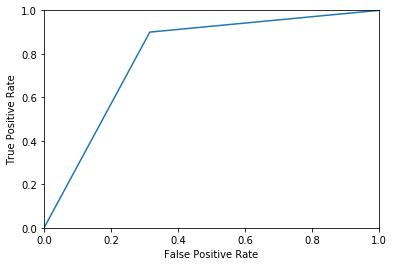

In [203]:
fpr,tpr, _ = roc_curve(y_test, lm_pred)
roc_auc = auc(fpr, tpr)

print(roc_auc)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()